In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Feed Forward ANN from scratch

<img src="./FeedForward.png" alt="drawing" width="600"/>

### Load Data

In [19]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples = 50, noise = 0.2, random_state= 42)

#### Check shape

In [2]:
X.shape, y.shape

((50, 2), (50,))

In [3]:
X

array([[-0.15856989,  0.98480618],
       [ 1.10900374, -0.62160223],
       [ 0.39641523,  0.20740869],
       [ 1.79239122,  0.07511293],
       [-0.84739307,  0.71154296],
       [ 1.90209657,  0.67432213],
       [ 0.0731551 ,  0.09079042],
       [-0.43566685,  0.29122072],
       [ 0.42577731, -0.22851359],
       [-0.64418143,  0.24144478],
       [ 0.11289285,  1.00510013],
       [ 0.96066405,  0.63183812],
       [ 1.46814927, -0.28580296],
       [ 0.5192833 ,  0.94984582],
       [ 0.73327397,  0.17310931],
       [ 0.33197143,  0.43375035],
       [ 1.62726102, -0.54736954],
       [ 2.01908805,  0.37804882],
       [ 2.00824323,  0.36058988],
       [-0.56195047,  0.90148197],
       [ 0.67647169,  0.69909987],
       [-0.30999892,  1.2113287 ],
       [-0.90842298, -0.33685748],
       [ 0.68268561, -0.44010332],
       [ 0.38645217, -0.05988231],
       [ 0.84405962, -0.16877927],
       [ 1.76324657, -0.30187296],
       [ 0.06417199,  0.2184967 ],
       [ 1.02670564,

In [4]:
y

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1])

#### Plot

Text(0, 0.5, 'X1')

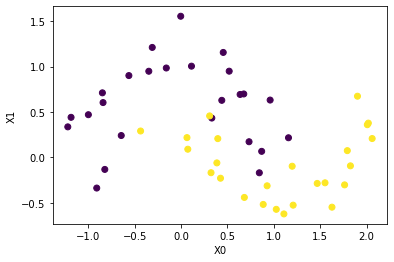

In [7]:
plt.scatter(X[:,0], X[:,1], c = y)
plt.xlabel('X0')
plt.ylabel('X1')

### Add Bias

In [8]:
arr = X

#### Create array of `1`s with the shape of the first dim of X 

In [9]:
np.ones((arr.shape[0], 1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

#### Add it to X

In [10]:
np.hstack([arr,np.ones((arr.shape[0], 1))]) 

array([[-0.15856989,  0.98480618,  1.        ],
       [ 1.10900374, -0.62160223,  1.        ],
       [ 0.39641523,  0.20740869,  1.        ],
       [ 1.79239122,  0.07511293,  1.        ],
       [-0.84739307,  0.71154296,  1.        ],
       [ 1.90209657,  0.67432213,  1.        ],
       [ 0.0731551 ,  0.09079042,  1.        ],
       [-0.43566685,  0.29122072,  1.        ],
       [ 0.42577731, -0.22851359,  1.        ],
       [-0.64418143,  0.24144478,  1.        ],
       [ 0.11289285,  1.00510013,  1.        ],
       [ 0.96066405,  0.63183812,  1.        ],
       [ 1.46814927, -0.28580296,  1.        ],
       [ 0.5192833 ,  0.94984582,  1.        ],
       [ 0.73327397,  0.17310931,  1.        ],
       [ 0.33197143,  0.43375035,  1.        ],
       [ 1.62726102, -0.54736954,  1.        ],
       [ 2.01908805,  0.37804882,  1.        ],
       [ 2.00824323,  0.36058988,  1.        ],
       [-0.56195047,  0.90148197,  1.        ],
       [ 0.67647169,  0.69909987,  1.   

#### Create a nice function to add the bias to any array

In [20]:
def add_bias(arr):
    #arr = np.c_[arr, np.ones((arr.shape[0], 1))]
    arr = np.hstack([arr,np.ones((arr.shape[0], 1))]) 
    return arr

In [21]:
X = add_bias(X)
X.shape

(50, 3)

In [22]:
X[0]

array([-0.15856989,  0.98480618,  1.        ])

### Define activation function
- Sigmoid function:
$s =  \frac{\mathrm{1} }{\mathrm{1} + e^-x } $

In [23]:
def sigmoid(X):
    s = 1/(1+np.exp(-X))
    return s

##### Test if you have the correct function with following code

In [24]:
a = np.array([-10.0, -1.0, 0.0, 1.0, 10.0])
expected = np.array([0.0, 0.27, 0.5, 0.73, 1.0])
assert np.all(sigmoid(a).round(2) == expected)

### Weights
- Initialize them randomly
- HOW MANY and in which SHAPE:
    - 3,2 for the input layer
    - 3,1 for the output layer


In [25]:
weights_h = np.random.normal(size = (3,2))
weights_o = np.random.normal(size = (3,1))

In [26]:
weights_h

array([[ 0.00866754, -0.99841535],
       [ 0.96786773,  1.44583883],
       [ 0.6829611 ,  1.0567854 ]])

In [27]:
weights_o

array([[ 0.50347316],
       [-0.87280897],
       [ 1.15804243]])

#### Check the shapes

In [28]:
weights_h.shape

(3, 2)

In [29]:
weights_o.shape

(3, 1)

#### Check that the dot product works

<img src="FeedForward.png" alt="drawing" width="600"/>

In [30]:
X.shape, weights_h.shape

((50, 3), (3, 2))

In [40]:
output = sigmoid(np.dot(add_bias(sigmoid(np.dot(X, weights_h))),weights_o))

array([[0.50658174],
       [0.51713701],
       [0.51350113],
       [0.4757674 ],
       [0.53704641],
       [0.46052314],
       [0.52768756],
       [0.53727709],
       [0.52658964],
       [0.54484069],
       [0.49739037],
       [0.48326097],
       [0.49492819],
       [0.48687641],
       [0.50372293],
       [0.50832301],
       [0.49803203],
       [0.46387313],
       [0.46443944],
       [0.522242  ],
       [0.48948201],
       [0.50428288],
       [0.56572867],
       [0.525115  ],
       [0.52244937],
       [0.51108489],
       [0.48661972],
       [0.52391047],
       [0.51818071],
       [0.4908103 ],
       [0.50832312],
       [0.4829725 ],
       [0.51298659],
       [0.50272427],
       [0.55745538],
       [0.48929723],
       [0.49216721],
       [0.52101548],
       [0.55921684],
       [0.51074683],
       [0.48482742],
       [0.55397499],
       [0.54001806],
       [0.46647813],
       [0.54830301],
       [0.49877127],
       [0.47916437],
       [0.513

In [31]:
def feed_forward(X, weights_h, weights_o):

    """
    1. Calculate the dot product of X
       and the weights of the first layer.

    2. Apply the sigmoid function on the result.

    3. Append an extra column of ones to the result (i.e. the bias).

    4. Calculate the dot product of the previous step
       with the weights of the second (i.e. outer) layer.

    5. Apply the sigmoid function on the result.

    6. Return all intermediate results (i.e. anything that is outputted
       by an activation function).
    """
    # 1. H_in
    weighted_sum = np.dot(X, weights_h)
    print(f'Shape of H_in = {weighted_sum.shape}')
    #print('H_in')
    #print(weighted_sum)
    
    # 2. H_out
    output_1 = sigmoid(weighted_sum)
    #print('H_out')
    #print(output_1)
    
    # 3. add bias
    input_out = add_bias(output_1)
    #print('H_out with bias')
    #print(input_out)
    
    # 4. O_in
    print(f'Shape of H_in = {weighted_sum.shape}')
    weighted_sum = np.dot(input_out, weights_o)
    #print('O_in')
    #print(weighted_sum)
    
    # 5. O_out -> actual prediction
    output_2 = sigmoid(weighted_sum)
    #print('O_out')
    #print(output_2)      
    
    # 6.
    return output_1, output_2

### Assertion Test for `weights` shapes

In [32]:
weights_h.shape

(3, 2)

In [33]:
out1, out2 = feed_forward(X, weights_h, weights_o)

Shape of H_in = (50, 2)
Shape of H_in = (50, 2)


In [34]:
out1, out2 = feed_forward(X, weights_h, weights_o)
assert out1.shape == (50, 2)
assert out2.shape == (50, 1)

Shape of H_in = (50, 2)
Shape of H_in = (50, 2)


#### Plot result

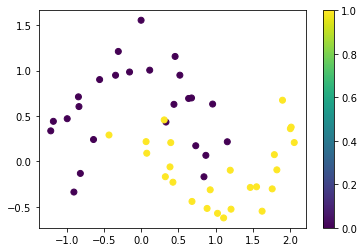

In [35]:
plt.scatter(X[:,0], X[:,1], c = y)
plt.colorbar()

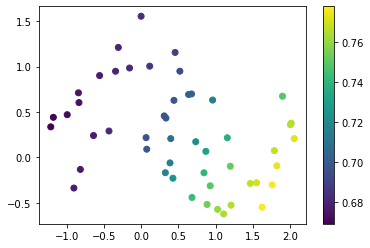

In [36]:
plt.scatter(X[:,0], X[:,1], c = out2)
plt.colorbar()

#### What does the result mean?

- --> The result it's whatever, all close to 0.5 (50% of being in each class)
- --> But that's ok, because we just took random weights
- --> We still have to learn the weights 
    - --> "Now the magic happens, by finding something to update the weights!"
    - --> The magic of Backpropagation and Gradient Descent that we will do in the afternoon

---

### Get Accuracy
- flatten both `ytrue` and `ypred` (so that they're both (50,) arrays)
- round the `ypred` (either up to 1 or down to 0)
- compare them to each other to get a boolean array (True where the values are the same, False where they are not)
- sum the boolean array and divide by the length (i.e. take the mean)

In [37]:
def get_accuracy(ypred,ytrue):
    acc = sum(ytrue.flatten() == ypred.flatten().round().astype(np.int64))
    return acc/len(ytrue)

In [38]:
get_accuracy(out2, y)

0.5